In [2]:
from fastai.vision.all import *         # 0.    load libraries
chosen_sample_seed          = 42        # 0.1   set parameters
chosen_sample_n             = 5

c:\Users\tonyp\miniconda3\envs\fastai\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
# useful informative functions
def print_useful_info():
    global path_dir_obj, list_all_img_path_obj
    print()
    print(f"path_obj_home_dir: \t{path_dir_obj}")
    print(f"image_list_count: \t{len(list_all_img_path_obj)}")
    return None

def print_sample_imgs():
    global path_dir_obj, list_all_img_path_obj, chosen_sample_seed, chosen_sample_n
    import random
    set_seed(chosen_sample_seed)
    print(f"set_seed_number: \t{chosen_sample_seed}")
    rng         = len(list_all_img_path_obj)-1  # Replace 10 with the desired upper limit (exclusive)
    random_nos  = random.sample(range(rng), chosen_sample_n)
    print()
    print("sample_images:")
    for index, img_path in enumerate(list_all_img_path_obj[random_nos]):
        print(f" {random_nos[index]:>7}: \t\t{img_path}")
    
    
    for image_path in list_all_img_path_obj[random_nos]:
        img = PILImage.create(image_path)
        show_image(img)
    return None

In [4]:
# 0. get paths of images
path_dir_obj                = untar_data(URLs.MNIST_TINY)
list_all_img_path_obj       = get_image_files(path_dir_obj)


path_obj_home_dir: 	C:\Users\tonyp\.fastai\data\mnist_tiny
image_list_count: 	1428
set_seed_number: 	42

sample_images:
    1309: 		C:\Users\tonyp\.fastai\data\mnist_tiny\valid\7\9036.png
     228: 		C:\Users\tonyp\.fastai\data\mnist_tiny\train\3\8830.png
      51: 		C:\Users\tonyp\.fastai\data\mnist_tiny\train\3\731.png
     563: 		C:\Users\tonyp\.fastai\data\mnist_tiny\train\7\868.png
     501: 		C:\Users\tonyp\.fastai\data\mnist_tiny\train\7\8186.png
699
709


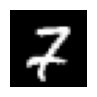

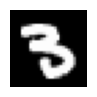

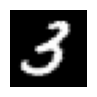

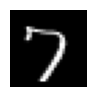

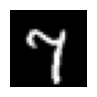

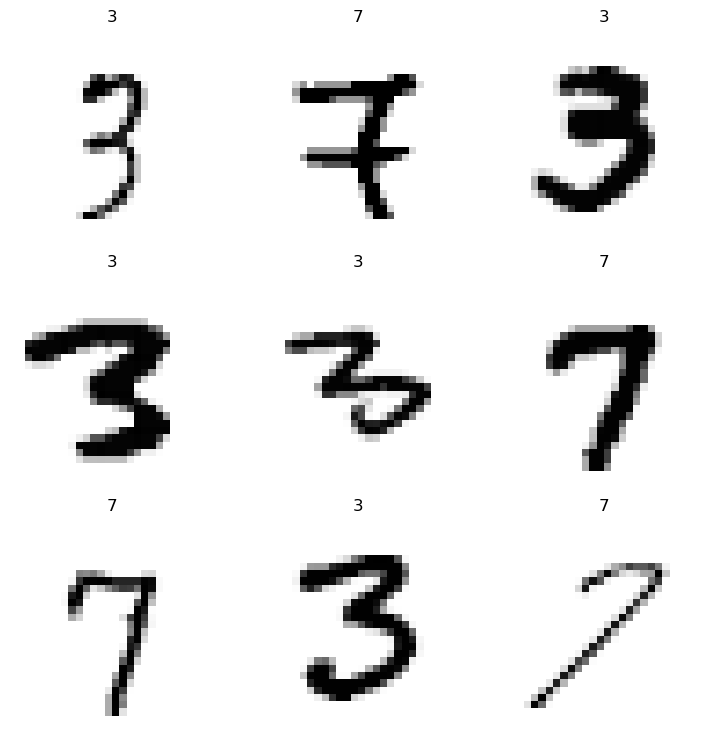

In [9]:
# 1. create learner
data_loader = ImageDataLoaders.from_folder(path_dir_obj, 
                                    img_cls=PILImageBW,
                                    set_seed=42)
x1,y1 = data_loader.one_batch()
test_eq(x1.shape, [64, 1, 28, 28])

print_useful_info()
print_sample_imgs()
# check valid data sets - can check if splits are as expected
print(len(data_loader.valid_ds.items)) # 699 as expected
print(len(data_loader.train_ds.items)) # 709 as expected

# can show sample pics
data_loader.show_batch() #show examples?

In [7]:
nbr_learner = vision_learner(data_loader, resnet34, metrics=error_rate)


In [8]:
nbr_learner.fine_tune(4)



epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.303663,0.174878,0.054363,00:21
1,0.228222,0.127563,0.040057,00:20
2,0.172806,0.091346,0.027182,00:21
3,0.139439,0.056558,0.015737,00:21


In [10]:
from IPython.display import Image # import image viewer

In [13]:

uploader = SimpleNamespace(data = ['3.png'])
image_path = uploader.data[0]
Image(filename=image_path)
res1, res2, res3 = nbr_learner.predict(image_path) # predict unseen input using LEARNER
print(res1,res2,res3, sep="\n") #fix output formatting later
print("correctly guessed the [0], representing [3]")

3
tensor(0)
tensor([9.9998e-01, 2.1658e-05])
correctly guessed the [0], representing [3]


In [14]:

uploader = SimpleNamespace(data = ['7.png'])
image_path = uploader.data[0]
Image(filename=image_path)
res1, res2, res3 = nbr_learner.predict(image_path) # predict unseen input using LEARNER
print(res1,res2,res3, sep="\n") #fix output formatting later
print("correctly guessed the [1], representing [7]")



7
tensor(1)
tensor([0.0050, 0.9950])
correctly guessed the [1], representing [7]
